In [34]:
# https://pypi.org/project/meteostat/
# pip install meteostat
# pip install requests

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly
from meteostat import Stations, Daily
from meteostat import Point
from meteostat import Stations, Monthly
from meteostat import Normals

Connecting to API

In [36]:
# headers = {'Accept':'application/json',
#             'Authorization':'Basic 34xasdwetgsd'}
# response = requests.get(url='https://meteostat.p.rapidapi.com',headers=headers)
# code = response.status_code
# reason =response.reason
# if code == 200:
#     print('Code: ' code,'Success: Alls is fine,',reason)
# elif code == 402:
#     print('No se ha podido autorizar usario, se ha devuelto el código de estado:', code,' y como razón del código de estado: ',reason)
# elif code == 404:
#     print('Algo ha salido mal, el recurso no se ha encontrado,se ha devuelto el código de estado:', code,':Not Found: This endpoint doesnt exist',reason)
# else:
#     print('Algo inesperado ha ocurrido, se ha devuelto el código de estado:', code,' y como razón del código de estado: ',reason)
    

<AxesSubplot:xlabel='time'>

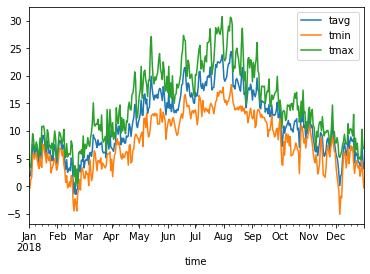

In [37]:
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [38]:
# https://dev.meteostat.net/python/point.html#example
# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)
vancouver


In [39]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(49.2497, -123.1193)
station = stations.fetch(1)

# Print DataFrame
print(station)

                       name country region    wmo  icao  latitude  longitude  \
id                                                                             
71201  Vancouver Harbour CS      CA     BC  71201  CWHC      49.3    -123.12   

       elevation           timezone hourly_start hourly_end daily_start  \
id                                                                        
71201        2.0  America/Vancouver   1980-03-01 2022-06-19  1925-11-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
71201 2022-06-18    1925-01-01  2022-01-01  5593.335349  


Example Ciudad Real

In [40]:
# location Ciudad Real
coord_cr = [38.986099, -3.927260, 628]
ciudad_real = Point(38.986099, -3.927260, 628)
ciudad_real

In [41]:
coord_v = (49.2497, -123.1193, 70)
vancouver = Point(49.2497, -123.1193, 70)
vancouver

In [42]:
# Time period
start = datetime(2000,1,1)
end = datetime(2021,12,31)

In [43]:
# Investigating station for the location CIUDAD REAL
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations_c = stations.nearby(38.986099, -3.927260, 628)
station_c = stations.fetch(1)
df_station_c = pd.DataFrame(station_c)
# Print DataFrame
print(df_station_c)

              name country region    wmo  icao  latitude  longitude  \
id                                                                    
00FAY  Holden Agdm      CA     AB  71227  <NA>     53.19    -112.25   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
00FAY      688.0  America/Edmonton   2020-01-01 2022-06-20  2002-11-01   

       daily_end monthly_start monthly_end      distance  
id                                                        
00FAY 2022-06-16    2003-01-01  2022-01-01  7.679811e+06  


In [44]:
# Investigatinf station for location Vancouver
coord_v = (49.2497, -123.1193, 70)
stations = Stations()
stations_v = stations.nearby(49.2497, -123.1193)
station_v = stations.fetch(1)
df_station_v = pd.DataFrame(station_v)
# Print DataFrame
print(df_station_v)


              name country region    wmo  icao  latitude  longitude  \
id                                                                    
00FAY  Holden Agdm      CA     AB  71227  <NA>     53.19    -112.25   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
00FAY      688.0  America/Edmonton   2020-01-01 2022-06-20  2002-11-01   

       daily_end monthly_start monthly_end       distance  
id                                                         
00FAY 2022-06-16    2003-01-01  2022-01-01  873319.937011  


In [45]:
# Daily data CIUDAD REAL
data_cr = Daily(ciudad_real,start, end)
data_cr = data_cr.fetch()
data_cr.reset_index(inplace=True)

In [46]:
data_cr.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2000-01-01,3.3,-1.8,10.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,2.4,-2.4,9.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,2.3,-1.6,6.8,0.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,0.6,-0.5,1.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,-0.9,-2.2,0.8,0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Trying other type of figure

# plt.figure(figsize= (12,8))
# plt.scatter(x= "time", y=["tmax"], data = data_cr)
# plt.show()

# plt.figure(figsize= (12,8))
# plt.scatter(x= "time", y=["tavg", "tmin", "tmax"], data = data_cr)
# plt.show()

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='time'>

Text(0.5, 1.0, 'The max and min Tª (°C9 in Ciudad Real')

<Figure size 1440x1440 with 0 Axes>

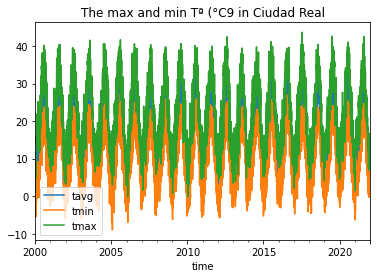

In [48]:
plt.figure(figsize= (20,20))
data_cr.plot(x = "time", y=["tavg","tmin", "tmax"])
plt.title("The max and min Tª (°C9 in Ciudad Real")
plt.show()

<AxesSubplot:xlabel='time'>

Text(0.5, 1.0, 'The daily precipitation total in mm in Ciudad real')

<Figure size 1440x1440 with 0 Axes>

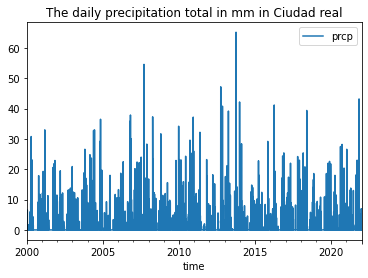

In [49]:
fig =plt.figure(figsize= (20,20))
data_cr.plot(x = "time", y=["prcp"])
plt.title("The daily precipitation total in mm in Ciudad real")
plt.show()

In [50]:
# Daily data Vancouver
data_v = Daily(vancouver,start, end)
data_v = data_v.fetch()
data_v.reset_index(inplace=True)

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='time'>

Text(0.5, 1.0, 'The max and min Tª (°C) in Vancouver')

<Figure size 1440x1440 with 0 Axes>

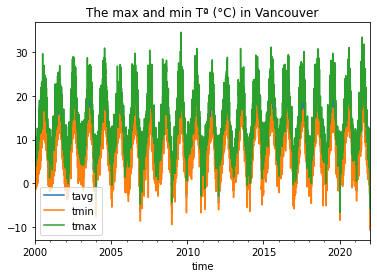

In [51]:
plt.figure(figsize= (20,20))
data_v.plot(x = "time", y=["tavg","tmin", "tmax"])
plt.title("The max and min Tª (°C) in Vancouver")
plt.show()

<AxesSubplot:xlabel='time'>

Text(0.5, 1.0, 'The daily precipitation total in mm in Vancouver')

<Figure size 1440x1440 with 0 Axes>

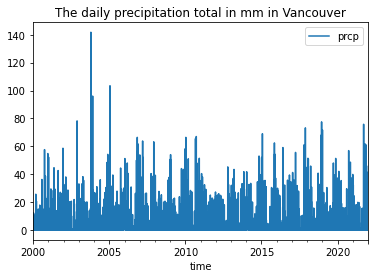

In [52]:
fig =plt.figure(figsize= (20,20))
data_v.plot(x = "time", y=["prcp"])
plt.title("The daily precipitation total in mm in Vancouver")
plt.show()

Looking for figures to compare precipitation and Tª at the same time

In [53]:
data_cr["prcp"].shape

(8036,)

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

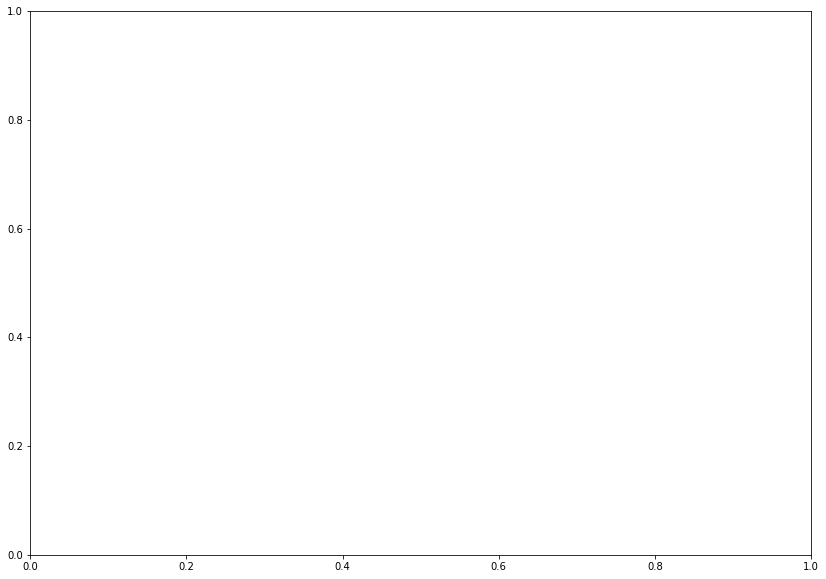

In [54]:
fig = plt.subplots(figsize= (14,10))

plt.bar()
data_cr.plot(x = "time", y=["prcp"])
data_v.plot(x = "time", y=["prcp"])
plt.title("The daily precipitation total in mm in Ciudad real and Vancouver")
plt.show()

In [ ]:
# https://colorbrewer2.org/#type=diverging&scheme=PRGn&n=3 paleta de colores
# https://www.codecademy.com/article/seaborn-design-ii


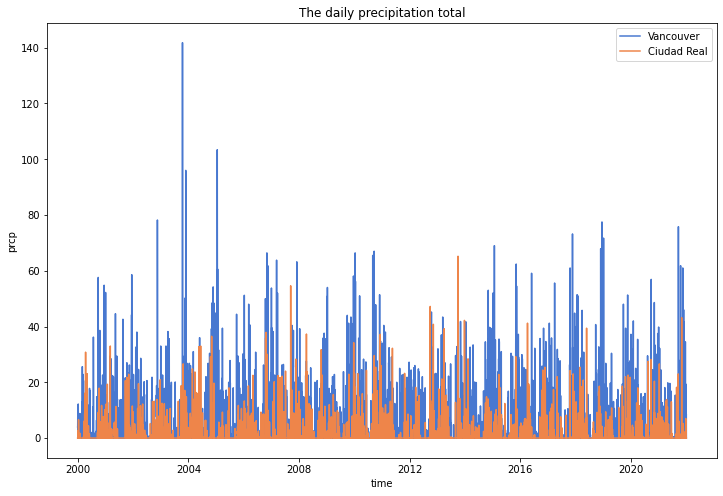

In [ ]:
plt.figure(figsize =(12,8))
# color1 = sns.color_palette("Pastel1", 1)
# color2 = sns.color_palette("Pastel2", 1)
# sns.set_palette("muted")

fig = sns.lineplot(x= "time", y="prcp" , data = data_v, ci=None)
fig = sns.lineplot(x= "time", y="prcp" , data = data_cr, ci=None)

fig.set_title('The daily precipitation total')
plt.legend(labels=["Vancouver","Ciudad Real"])
plt.show()

<Figure size 720x1080 with 0 Axes>

Text(0.5, 1.0, 'The daily precipitation total in mm in Ciudad real')

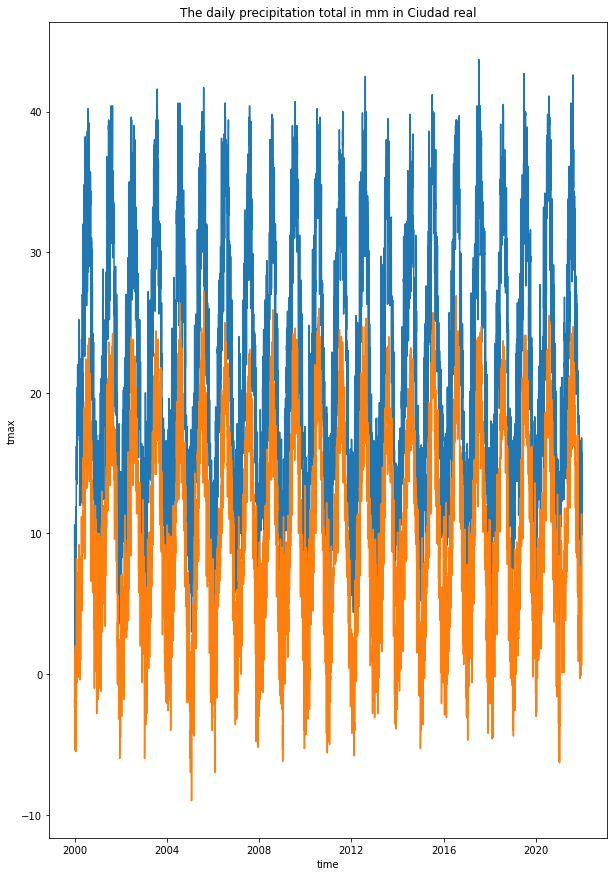

: 

In [55]:
plt.figure(figsize =(10,15))
fig = sns.lineplot(x= "time", y="tmax", data = data_cr, ci=None)
fig = sns.lineplot(x= "time", y="tmin", data = data_cr, ci=None)
# fig = sns.lineplot(x= "time", y="tavg", data = data_cr, ci=None)
# fig.set(xlabel='The daily precipitation total in mm in Ciudad real', ylabel = 'Longitud de la aleta en mm')
fig.set_title('The daily precipitation total in mm in Ciudad real')
plt.show()

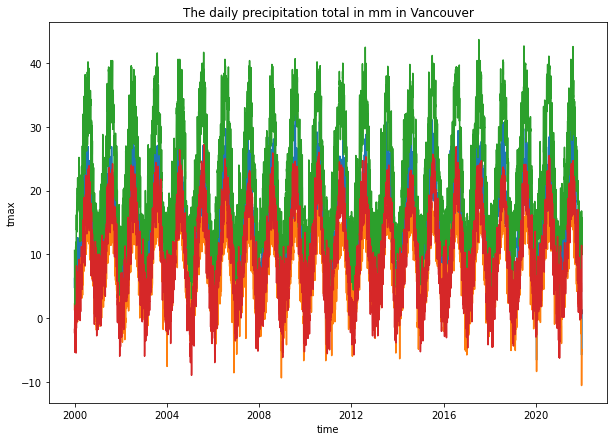

In [ ]:
plt.figure(figsize =(10,7))
fig = sns.lineplot(x= "time", y="tmax", data = data_v, ci=None)
fig = sns.lineplot(x= "time", y="tmin", data = data_v, ci=None)
fig = sns.lineplot(x= "time", y="tmax", data = data_cr, ci=None)
fig = sns.lineplot(x= "time", y="tmin", data = data_cr, ci=None)
# fig = sns.lineplot(x= "time", y="tavg", data = data_cr, ci=None)
# fig.set(xlabel='The daily precipitation total in mm in Ciudad real', ylabel = 'Longitud de la aleta en mm')
fig.set_title('The daily precipitation total in mm in Vancouver')
plt.show()

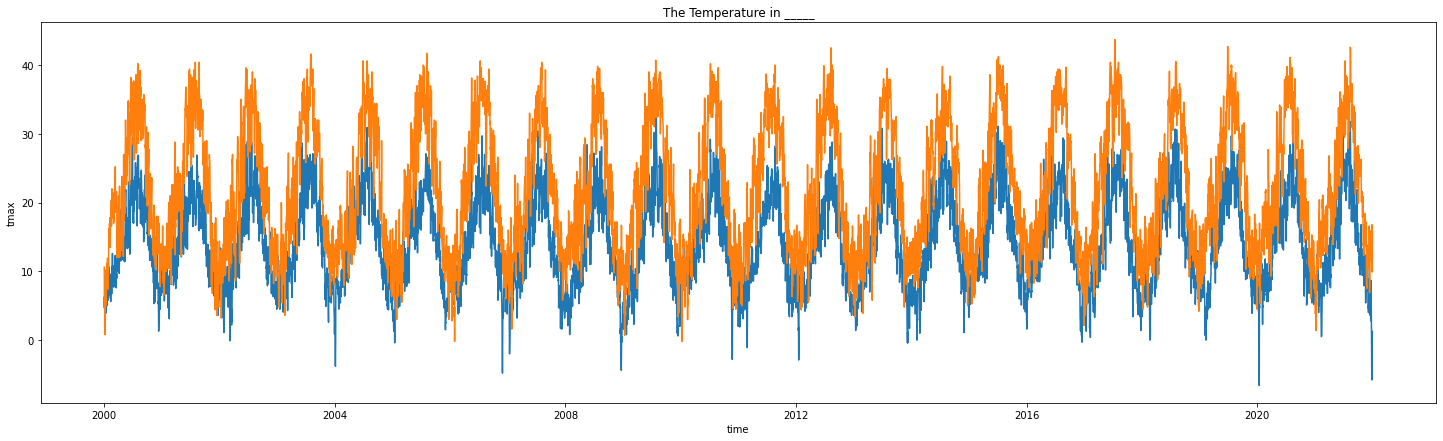

In [ ]:
plt.figure(figsize =(25,7))
fig = sns.lineplot(x= "time", y="tmax", data = data_v)
# fig = sns.lineplot(x= "time", y="tmin", data = data_v)
fig = sns.lineplot(x= "time", y="tmax", data = data_cr)
# fig = sns.lineplot(x= "time", y="tmin", data = data_cr)
# fig = sns.lineplot(x= "time", y="tavg", data = data_cr, ci=None)
# fig.set(xlabel='The daily precipitation total in mm in Ciudad real', ylabel = 'Longitud de la aleta en mm')
fig.set_title('The Temperature in _____')
fig.set_legend
plt.show()